## Problem 1.B

In [71]:
### Don't mind about this 
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # I will use the Sklearn to get kNN
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import math
from statistics import mode

In [72]:
digits_X = pd.read_csv('mnist_train.csv') #put the data in pd Frame
digits_X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Separate the Label from the Training Data
train_Y = digits_X['label']
train_X = digits_X.iloc[:,1:] 

In [74]:
print(train_X.shape)
print(train_Y.shape)

(60000, 784)
(60000,)


In [75]:
Test_X = pd.read_csv('mnist_test.csv') #put the data in pd Frame
Test_X.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
test_Y = Test_X['label']
test_X = Test_X.iloc[:,1:]

In [77]:
test_X.shape

(10000, 784)

In [78]:
from sklearn import preprocessing

X = train_X.values
scalar = preprocessing.StandardScaler()
#scalar.fit(X)
Scaled_x = scalar.fit_transform(X)

xs = pd.DataFrame(Scaled_x,columns = train_X.columns)

In [79]:
train_X.shape
X = train_X.values

In [81]:
xs.shape


(60000, 784)

In [82]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=10,covariance_type='full',max_iter = 100)
model.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [111]:
y_pred = model.predict(train_X)
y_pred

array([1, 5, 9, ..., 1, 6, 1])

In [148]:
y_prob = model.predict_proba(train_X)
y_prob

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.16803063e-46, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [112]:
train_Y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [114]:
from sklearn.metrics.cluster import contingency_matrix
list1 = train_Y.values
list2 = y_pred
mapper = np.argmax(contingency_matrix(list1, list2), axis=1)


In [ ]:
#Another way of mapping "Not the best"
label_pred = []
for i in range (y_prob.shape[0]):
    label_pred.append(np.argmax(y_prob[i]))
    

In [117]:
mapper

array([5, 8, 5, 5, 5, 1, 5, 9, 8, 9])

In [120]:
y_predt = model.predict(test_X.values)
y_predt

array([9, 7, 8, ..., 1, 1, 6])

## Problem 1.C


In [123]:
from sklearn.metrics import classification_report
print(classification_report(mapper[test_Y], np.array(y_predt)))

             precision    recall  f1-score   support

          1       0.31      0.41      0.35       892
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.83      0.60      0.70      4962
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.69      0.76      0.72      2109
          9       0.79      0.72      0.75      2037

avg / total       0.74      0.64      0.68     10000



In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(mapper[test_Y], y_predt)

0.6421

## Check the classification report with the training data set

In [124]:
print(classification_report(mapper[train_Y], np.array(y_pred)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.31      0.43      0.36      5421
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0
          5       0.84      0.59      0.69     29772
          6       0.00      0.00      0.00         0
          7       0.00      0.00      0.00         0
          8       0.68      0.75      0.71     12593
          9       0.79      0.70      0.74     12214

avg / total       0.75      0.63      0.68     60000



In [125]:
accuracy_score(mapper[train_Y], y_pred)

0.6322

## Problem 1.D

### The problem of the fact that we cannot see it clearly is because of "standardization"

In [100]:
mn = model.means_
mn

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

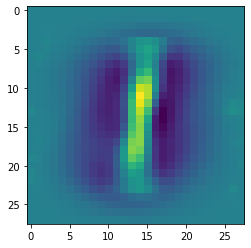

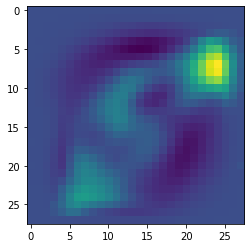

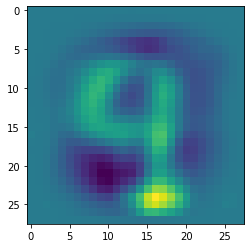

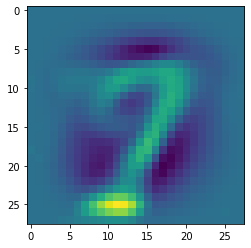

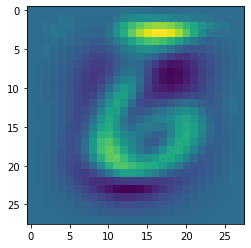

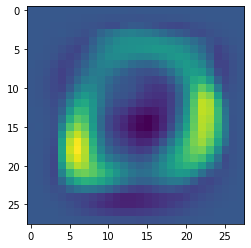

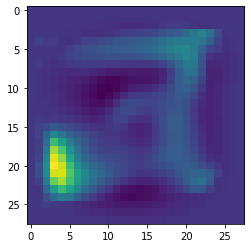

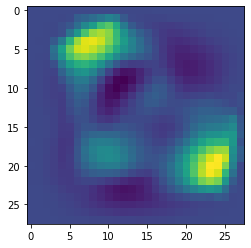

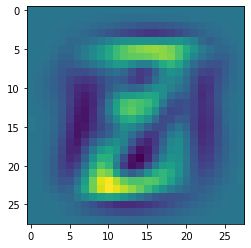

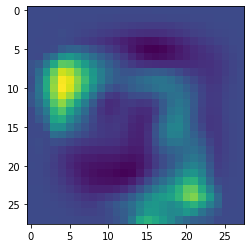

In [101]:
for mean in mn:
    plt.imshow(mean.reshape(28,28)) #reshape the pitcture
    plt.show()

## Without Standardization

In [139]:
model = mixture.GaussianMixture(n_components=10,covariance_type='full',max_iter = 100)
model.fit(train_X.values)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [140]:
y_pred_w = model.predict(train_X.values)


list1 = train_Y.values
list2 = y_pred_w
mapper_w = np.argmax(contingency_matrix(list1, list2), axis=1)

In [141]:
print(classification_report(mapper_w[train_Y], np.array(y_pred_w)))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.50      0.64      0.56     12691
          4       0.33      0.43      0.37      5958
          5       0.00      0.00      0.00         0
          6       0.78      0.41      0.54     29168
          7       0.71      0.48      0.57      6265
          8       0.00      0.00      0.00         0
          9       0.93      0.52      0.67      5918

avg / total       0.68      0.48      0.54     60000



In [142]:
accuracy_score(mapper_w[train_Y], y_pred_w)

0.4795833333333333

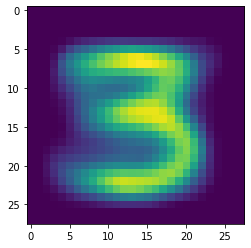

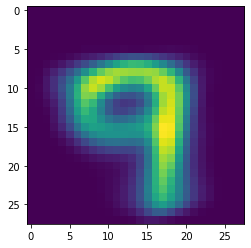

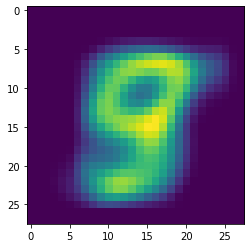

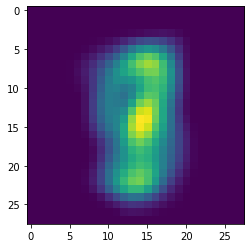

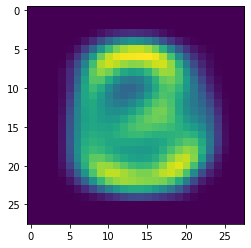

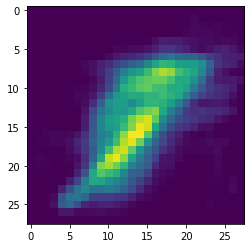

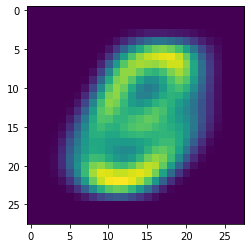

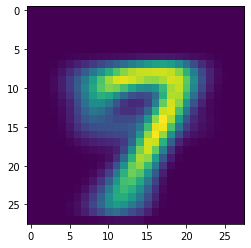

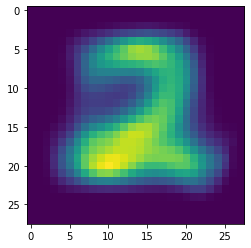

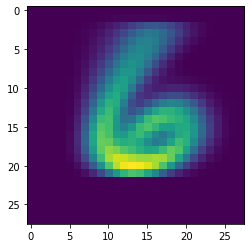

In [147]:
mn = model.means_
for mean in (mn):
    plt.imshow(mean.reshape(28,28)) #reshape the pitcture
    plt.show()

## Using PCA

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets
pca = decomposition.PCA(n_components=150)
pca.fit(train_X.values)
X_pca = pca.transform((train_X.values))

In [135]:
model = mixture.GaussianMixture(n_components=10,covariance_type='full',max_iter = 100)
model.fit(X_pca)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [136]:
y_pred_pca = model.predict(X_pca)


list1 = train_Y.values
list2 = y_pred_pca
mapper_pca = np.argmax(contingency_matrix(list1, list2), axis=1)

In [137]:
print(classification_report(mapper_pca[train_Y], np.array(y_pred_pca)))

             precision    recall  f1-score   support

          0       0.45      0.89      0.60      5958
          1       0.99      0.55      0.71      6742
          2       0.58      0.45      0.51     11272
          3       0.52      0.45      0.49      6265
          4       0.45      0.39      0.42      5949
          5       0.51      0.46      0.48      5842
          6       0.26      0.36      0.30      6131
          7       1.00      0.68      0.81      5923
          8       0.97      0.72      0.83      5918
          9       0.00      0.00      0.00         0

avg / total       0.64      0.54      0.57     60000



In [138]:
accuracy_score(mapper_pca[train_Y], y_pred_pca)

0.5425833333333333